In [27]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data Exploration of MAC

In [3]:
import os
import sys

# Get the current working directory
notebook_dir = os.getcwd()

# Change the working directory to the root directory of the project
os.chdir("../")

# move up to the parent directory(project root)
sys.path.append(os.path.abspath(os.path.join(notebook_dir, "..")))

os.getcwd()

'c:\\Users\\mhannani\\Documents\\sentiment_analysis'

In [28]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.utils.parsers import parse_toml
from src.preprocessor.preprocessor import Preprocessor

In [29]:
# configration filepath
CONFIG_FILE = Path("configs/config.toml")

# read configuration object
config = parse_toml(CONFIG_FILE)

# useful variables
data_root = Path(config['data']['root'])
exernal_data = config['data']['external']
raw_data = config['data']['raw']
interim_data = config['data']['interim']
processed_data = config['data']['processed']
mac_csv_filename = config['data']['mac_csv_filename']



# constructing the filepath of the corpus
csv_filepath_raw_data = data_root / raw_data / mac_csv_filename

In [30]:

preprocessor = Preprocessor(config, csv_filepath_raw_data, output_json_path = None)
df = preprocessor.preprocess()

In [31]:
df.tail()

,tweets,type,class_name
18082,ريالية و افتخر و نعلي راسي الفوق,1,dialectal
18083,ماكاين مشكل,1,dialectal
18084,سمح ليا ماقصدتش,1,dialectal
18085,الله يكمل عليها بالخير,1,dialectal
18086,يمكن و الله اعلم,0,dialectal


## Visualize class frequency 

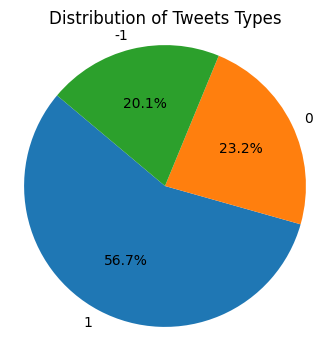

In [32]:
from src.utils.visualizers import visualize_class_frequencies
visualize_class_frequencies(df)

In [34]:
type_counts = df['class_name'].value_counts()

In [35]:
type_counts

class_name
standard     12151
dialectal     5278
diatectal       12
Name: count, dtype: int64